In [40]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline

# 3. Edge Detection

In [48]:
from skimage.measure import compare_ssim
from evaluate import evaluate
# The code returns the accuracy of the edge detector when compared against the ground truth
# OUTPUT_FILE_PATH: Path of the image containing the edges obtained using edge detector
# GROUND_TRUTH_PATH: Path of the corresponding ground truth image (present in the folder data/ground_truth)
# An example of how to use the evaluate function is shown as follows:
OUTPUT_FILE_PATH = 'data/test.png'
GROUND_TRUTH_PATH = 'data/ground_truth/3096.bmp'
print ('Accuracy: %f' %(evaluate(OUTPUT_FILE_PATH, GROUND_TRUTH_PATH)))

Accuracy: 0.621913


In [13]:
# a function to save result for specific edge detector and report the accuracy
def Test_Edge_Detector(func, INPUT_FILE_PATH, OUTPUT_FILE_PATH, GROUND_TRUTH_PATH):
    acc = []
    for input_image_path in os.listdir(INPUT_FILE_PATH):
        input_image_id = input_image_path.split('.')[0]
        output_image = func(os.path.join(INPUT_FILE_PATH,input_image_path))
        output_image_path = os.path.join(OUTPUT_FILE_PATH,input_image_id+'_'+func.__name__+'.jpg')
        cv2.imwrite(output_image_path, output_image)
        ground_truth_path = os.path.join(GROUND_TRUTH_PATH,input_image_id+'.bmp')
        acc.append(evaluate(output_image_path, ground_truth_path))
    return acc

In [41]:
# a function to save result for specific edge detector
def Edge_Detector_Predict(func, INPUT_FILE_PATH, OUTPUT_FILE_PATH):
    for input_image_path in os.listdir(INPUT_FILE_PATH):
        input_image_id = input_image_path.split('.')[0]
        output_image = func(os.path.join(INPUT_FILE_PATH,input_image_path))
        output_image_path = os.path.join(OUTPUT_FILE_PATH,input_image_id+'_'+func.__name__+'.jpg')
        cv2.imwrite(output_image_path, output_image)

In [52]:
# a function to report the accuracy
def Edge_Detector_Eval(func, OUTPUT_FILE_PATH, GROUND_TRUTH_PATH):
    acc = []
    for ground_truth_image in os.listdir(GROUND_TRUTH_PATH):
        ground_truth_id = ground_truth_image.split('.')[0]
        ground_truth_path = os.path.join(GROUND_TRUTH_PATH,ground_truth_image)
        output_image_path = os.path.join(OUTPUT_FILE_PATH,ground_truth_id+'_'+func.__name__+'.jpg')
        acc.append(evaluate(output_image_path, ground_truth_path))
    return acc

## 3.1 Edge Detector 1

Sobel

Refer to tutorial  
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_gradients/py_gradients.html#gradients

In [83]:
### Sobel
### Fill your code here
### Using the build-in funciton of OpenCV
def Sobel(IMAGE_PATH):
    img = cv2.imread(IMAGE_PATH,0)
    # Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
    Sobel64f_x = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=3)
    Sobel64f_y = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=3)
    Sobel_8u = np.uint8(np.sqrt((Sobel64f_x).astype(int)**2+(Sobel64f_y).astype(int)**2))
    return Sobel_8u

### Report the accuracy obtained
Edge_Detector_Predict(Sobel, 'data/img', 'data/edge/Sobel')
acc_Sobel = Edge_Detector_Eval(Sobel, 'data/edge/Sobel', 'data/ground_truth')  
print('Sobel: Average accuracy of test images: %f'%np.mean(acc_Sobel))

### Report any improvements you have tried

### Tried with Scharr operator(but not any improvement)
'''
def Scharr(IMAGE_PATH):
    img = cv2.imread(IMAGE_PATH,0)
    # Output dtype = cv2.CV_64F. Then take its absolute and convert to cv2.CV_8U
    Scharr64f_x = cv2.Scharr(img,cv2.CV_64F,1,0)
    Scharr64f_y = cv2.Scharr(img,cv2.CV_64F,0,1)
    Scharr_8u = np.uint8(np.sqrt((Scharr64f_x).astype(int)**2+(Scharr64f_y).astype(int)**2))
    return Scharr_8u
'''
### Tried with Sobel operator only positive(slight improvement)
def Sobel_pos(IMAGE_PATH):
    img = cv2.imread(IMAGE_PATH,0)
    Sobel8u_x = cv2.Sobel(img,cv2.CV_8U,1,0,ksize=3)
    Sobel8u_y = cv2.Sobel(img,cv2.CV_8U,0,1,ksize=3)
    Sobel_8u = np.uint8(np.sqrt((Sobel8u_x).astype(int)**2+(Sobel8u_y).astype(int)**2))
    return Sobel_8u

Edge_Detector_Predict(Sobel_pos, 'data/img', 'data/edge/Sobel')
acc_Sobel_pos = Edge_Detector_Eval(Sobel_pos, 'data/edge/Sobel', 'data/ground_truth')  
print('Sobel_pos: Average accuracy of test images: %f'%np.mean(acc_Sobel_pos))

Sobel: Average accuracy of test images: 0.358158
Sobel_pos: Average accuracy of test images: 0.468546


## 3.2 Edge Detector 2

Canny

Refer to tutorial  
http://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_canny/py_canny.html

In [89]:
### Canny
### Fill your code here
### Using the build-in funciton of OpenCV

def Canny(IMAGE_PATH,MIN_THRES=200,MAX_THRES=255):
    img = cv2.imread(IMAGE_PATH,0)
    Canny_edge = cv2.Canny(img,MIN_THRES,MAX_THRES,3,3,True)
    return Canny_edge

### Report the accuracy obtained
Edge_Detector_Predict(Canny, 'data/img', 'data/edge/Canny')
acc_Canny = Edge_Detector_Eval(Canny, 'data/edge/Canny', 'data/ground_truth')  
print('Canny: Average accuracy of test images: %f'%np.mean(acc_Canny))

### Report any improvements you have tried
### automatically choose the threshold adaptively, but no improvement.
def Canny_autothres(IMAGE_PATH,sigma = 0.05):
    img = cv2.imread(IMAGE_PATH,0)
    v = np.median(img)
    MIN_THRES = int(max(0, (1.0 - sigma) * v))
    MAX_THRES = int(min(255, (1.0 + sigma) * v))
    Canny_edge = cv2.Canny(img,MIN_THRES,MAX_THRES,3,3,True)
    return Canny_edge

Edge_Detector_Predict(Canny_autothres, 'data/img', 'data/edge/Canny')
acc_Canny_autothres = Edge_Detector_Eval(Canny_autothres, 'data/edge/Canny', 'data/ground_truth')  
print('Canny_autothres: Average accuracy of test images: %f'%np.mean(acc_Canny_autothres))


Canny: Average accuracy of test images: 0.605585
Canny_autothres: Average accuracy of test images: 0.368369


## 3.3 Edge Detector 3
gPb

Refer to source coded provided by  
https://www2.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/resources.html  
Hand-crafted defined feature and multi-scale combination. Hard to change any part. Only twisted with the final output, including Ultrametric Contour Map or not.

In [113]:
### Fill your code here
import matlab.engine

def gPb(IMAGE_PATH,k=0.3):
    eng = matlab.engine.start_matlab()
    eng.addpath(r'../ref/BSR/grouping/',nargout=0)
    eng.addpath(r'../ref/BSR/grouping/lib/',nargout=0)
    edge = eng.gPb(IMAGE_PATH,k)
    edge = np.array(edge)
    eng.quit()  
    return edge

### Report the accuracy obtained
# Edge_Detector_Predict(gPb, 'data/img', 'data/edge/gPb')
acc_gPb = Edge_Detector_Eval(gPb, 'data/edge/gPb', 'data/ground_truth')  
print('gPb: Average accuracy of test images: %f'%np.mean(acc_gPb))

### Report any improvements you have tried

gPb: Average accuracy of test images: 0.746033


## 3.4 Edge Detector 4
Sketch Token

Refer to source coded provided by  
https://github.com/gitlim/SketchTokens  
The problem is that Sketch Token is even more precise than the groundtruth which will be evaluated as false positive.

In [116]:
### Fill your code here
import matlab.engine

def SketchToken(IMAGE_PATH):
    eng = matlab.engine.start_matlab()
    eng.addpath(r'../ref/SketchTokens/',nargout=0)
    eng.addpath(r'../ref/SketchTokens/toolbox/channels/',nargout=0)
    edge = eng.SketchToken(IMAGE_PATH)
    edge = np.array(edge)
    eng.quit()  
    return edge

### Report the accuracy obtained
Edge_Detector_Predict(SketchToken, 'data/img', 'data/edge/SketchToken')
acc_SketchToken = Edge_Detector_Eval(SketchToken, 'data/edge/SketchToken', 'data/ground_truth')  
print('Sketch Token: Average accuracy of test images: %f'%np.mean(acc_SketchToken))

### Report any improvements you have tried

Sketch Token: Average accuracy of test images: 0.579100


## 3.5 Edge Detector 5
Structured Forests

Refer to source coded provided by  
https://github.com/ArtanisCV/StructuredForests

In [93]:
### Fill your code here
import sys
import os
os.chdir('../ref/StructuredForests/')
sys.path.append(os.getcwd())
from StructuredForests import *

def StructuredForests(IMAGE_PATH):
    edge = edge_predict(IMAGE_PATH) 
    return edge

### Report the accuracy obtained
Edge_Detector_Predict(StructuredForests, '../../Project1/data/img', '../../Project1/data/edge/StructuredForests')
acc_StructuredForests = Edge_Detector_Eval(StructuredForests, '../../Project1/data/edge/StructuredForests', '../../Project1/data/ground_truth')  
print('Structured Forests: Average accuracy of test images: %f'%np.mean(acc_StructuredForests))
os.chdir('../../Project1/')

### Report any improvements you have tried

Structured Forests: Average accuracy of test images: 0.758131


## 3.6 Edge Detector 6
Boosted Edge Learning(BEL)

Refer to source coded provided by  
http://pages.ucsd.edu/~ztu/Download.htm  
Ran on another windows computer and saved the output to evaluate. Didn't try to improve.

In [92]:
### Fill your code here
### generated offline on windows
def BEL():
    return None

### Report the accuracy obtained
acc_BEL = Edge_Detector_Eval(BEL, 'data/edge/BEL', 'data/ground_truth')  
print('BEL: Average accuracy of test images: %f'%np.mean(acc_BEL))

### Report any improvements you have tried

BEL: Average accuracy of test images: 0.741982


## A summary chart graph

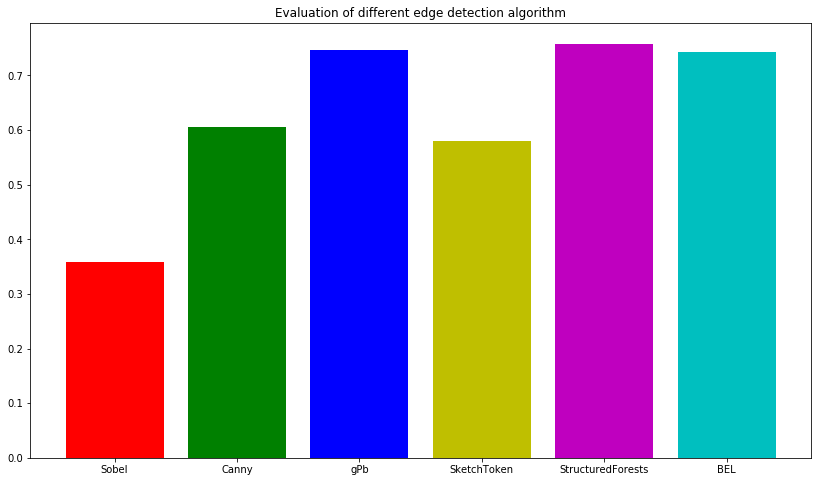

In [114]:
name_list = ['Sobel','Canny','gPb','SketchToken','StructuredForests','BEL'] 
acc_list = [np.mean(acc_Sobel),np.mean(acc_Canny),np.mean(acc_gPb),np.mean(acc_SketchToken),np.mean(acc_StructuredForests),np.mean(acc_BEL)]  

plt.figure(figsize=(14,8))
plt.bar(range(len(name_list)), acc_list, color='rgbymc',tick_label=name_list)
plt.title('Evaluation of different edge detection algorithm')
plt.show()  
